The objective use the ARM ocean data and obtain a precipitation buoyancy relationship

In [1]:
import pathlib
import importlib
import multiprocessing
import matplotlib.pyplot as plt
import xarray as xr
import warnings
import numpy as np
from time import perf_counter
%matplotlib inline

In [2]:
import Process_ARM, Preprocess_precipbuoy_plotting, Plot_buoy_statistics

importlib.reload(Process_ARM)
importlib.reload(Preprocess_precipbuoy_plotting)
importlib.reload(Plot_buoy_statistics)

from Process_ARM import ProcessARM
from Preprocess_precipbuoy_plotting import BuoyPrecip
from Plot_buoy_statistics import plot_bl_stats

In [3]:
# List of directories showing ARM data
! ls /neelin2020/ARM/

CACTI  GoAmazon  SGP  TWPC1  TWPC2  TWPC3


File locations to ARMBE data <br>
<b>TWPC1</b>(Manus; PNG), <b>TWPC2</b> (Nauru) and <b>TWPC3</b> (Darwin; Aus.)
    

In [4]:
arm_path = pathlib.Path('/neelin2020/ARM/')
arm_files = dict(TWPC1 = arm_path / 'TWPC1',
                TWPC2 = arm_path / 'TWPC2',
                TWPC3 = arm_path / 'TWPC3')

In [5]:
# run code to preprocess ARM data
twpc1 = ProcessARM(arm_files['TWPC1'], nprocs=10)  # nprocs refers to number of processors
twpc2 = ProcessARM(arm_files['TWPC2'], nprocs=10)  # nprocs refers to number of processors
twpc3 = ProcessARM(arm_files['TWPC3'], nprocs=10)  # nprocs refers to number of processors

with warnings.catch_warnings():  # context manager to supress warnings
    warnings.simplefilter("ignore")
    t1 = perf_counter()

    twpc1.main()  #  process twpc1
    t2 = perf_counter()
    print(f'Took {(t2 - t1)/60:.2f} minutes')
    
    twpc2.main()  #  process twpc2
    t3 = perf_counter()
    print(f'Took {(t3 - t1)/60:.2f} minutes')

    twpc3.main()
    print(f'Took {(perf_counter() - t3)/60:.2f} minutes')

    

Took 0.03 minutes
Took 0.04 minutes
Took 0.01 minutes


In [6]:
importlib.reload(Preprocess_precipbuoy_plotting)
from Preprocess_precipbuoy_plotting import BuoyPrecip
importlib.reload(Plot_buoy_statistics)
from Plot_buoy_statistics import plot_bl_stats

In [7]:
pb_dict = {}
for key in [twpc1, twpc2, twpc3]:
    pb_dict[str(key)] = BuoyPrecip(key.precip, key.buoy, key.cape, key.subsat)
    pb_dict[str(key)].bin_precip_1D()
    pb_dict[str(key)].bin_precip_2D()
    

plot for a single region

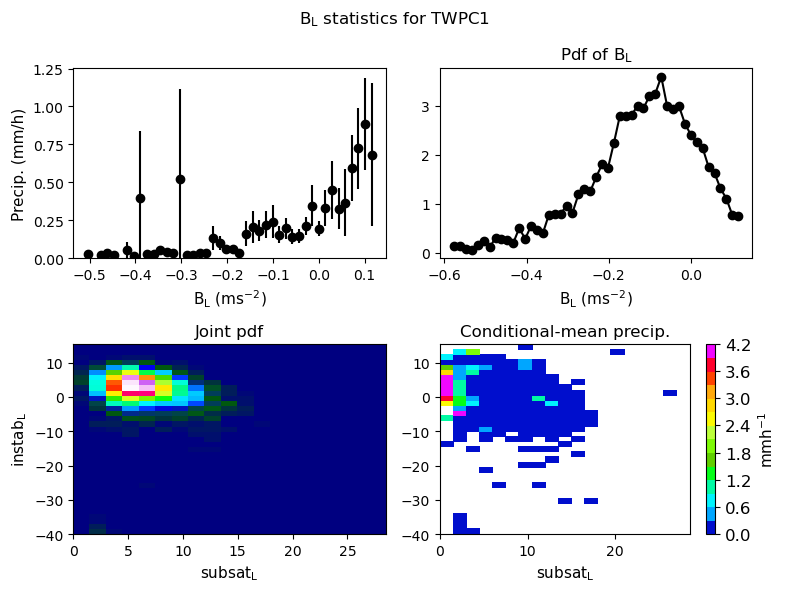

In [8]:
region = 'TWPC1'  # select region
ds = pb_dict[region]  # 
plt_dir = './'  # select plot directory 

plot_params = dict(color = 'black', xlabel = "$\mathrm{B_L}$ ($\mathrm{ms^{-2}}$)", 
                   ylabel = "Precip. (mm/h)", plt_title = region, plt_dir = './')

with warnings.catch_warnings():  # context manager to supress warnings
    warnings.simplefilter("ignore")
    plot_bl_stats(ds, plot_params, SAVE_PLOT = False)

In [9]:
# process pooled data
new_ds = pb_dict['TWPC1'] + pb_dict['TWPC2'] + pb_dict['TWPC3']
new_ds.bin_precip_1D()
new_ds.bin_precip_2D()

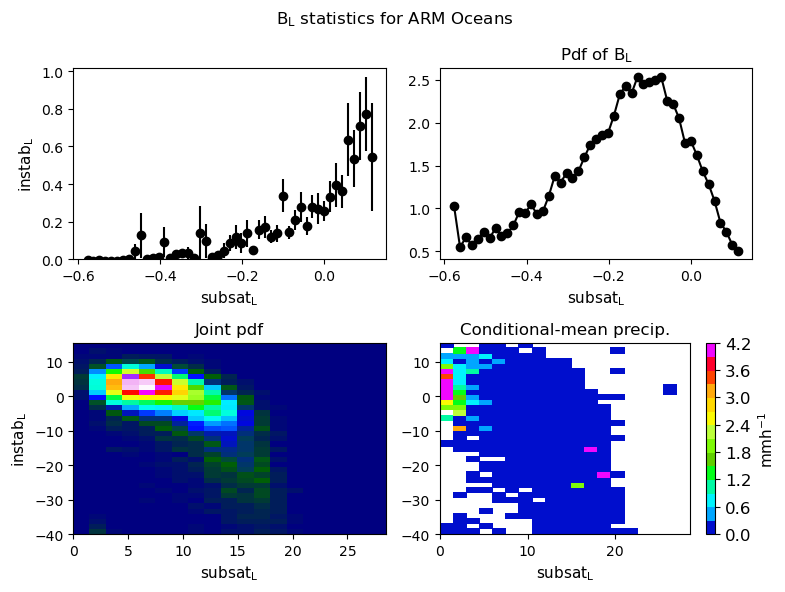

In [10]:
ds = new_ds
plot_params.update(plt_title = 'ARM Oceans')
with warnings.catch_warnings():  # context manager to supress warnings
    warnings.simplefilter("ignore")
    plot_bl_stats(ds, plot_params, SAVE_PLOT = False)